# Identification of Students with Similar Performance in Micro- Learning Programming Courses with Automatically Evaluated Student Assignments

Draft code for the paper.

Import required libarries.

In [1]:
import pandas as pd
import pycaret
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset. Students with zero activity have been already removed.

In [2]:
dataset = pd.read_csv('data_java_21_aggregated_not_zero.csv', sep = ';')

## Exploratory Data Analysis

In [3]:
dataset.shape

(102, 27)

In [4]:
dataset.head()

,intro,intro-VPL,methods,methods-VPL,encap,encap-VPL,constructors,constructors-VPL,classes1,classes1-VPL,...,polymorphism-VPL,intro-VPL.1,methods-VPL-f,encap-VPL-f,constructors-VPL-f,classes2-VPL-f,static-VPL-f,inher-VPL-f,polymorphism-VPL-f,sum_vpl
0,110,60,160,630,148,100,110,165,80,0,...,45,60,630,100,165,95,270,270,45,2753
1,110,60,160,630,150,100,110,165,80,0,...,45,60,630,100,165,95,270,270,45,2753
2,110,60,160,630,150,100,110,165,80,0,...,45,60,630,100,165,92,270,270,45,2752
3,110,60,160,630,150,100,110,165,80,0,...,45,60,630,100,165,95,270,270,45,2752
4,110,60,160,630,150,100,110,157,80,0,...,45,60,630,100,157,95,270,270,45,2747


In [5]:
dataset.tail(20)

,intro,intro-VPL,methods,methods-VPL,encap,encap-VPL,constructors,constructors-VPL,classes1,classes1-VPL,...,polymorphism-VPL,intro-VPL.1,methods-VPL-f,encap-VPL-f,constructors-VPL-f,classes2-VPL-f,static-VPL-f,inher-VPL-f,polymorphism-VPL-f,sum_vpl
82,50,0,60,0,30,0,50,0,0,0,...,0,0,0,0,0,93,70,0,0,483
83,97,20,0,100,10,70,0,124,0,0,...,0,20,100,70,124,0,30,0,0,451
84,10,20,0,140,50,40,0,60,0,0,...,0,20,140,40,60,0,70,30,0,430
85,10,20,0,140,50,40,0,60,0,0,...,0,20,140,40,60,0,70,30,0,430
86,0,60,0,60,10,70,0,98,0,0,...,0,60,60,70,98,0,40,30,0,408
87,71,60,93,183,0,0,0,0,0,0,...,0,60,183,0,0,0,0,0,0,407
88,0,0,0,188,0,40,0,65,0,0,...,0,0,188,40,65,0,38,40,0,371
89,85,0,128,80,26,34,0,0,0,0,...,0,0,80,34,0,0,0,0,0,353
90,107,60,0,100,0,20,0,0,0,0,...,0,60,100,20,0,0,0,0,0,287
91,106,60,50,40,0,0,0,0,0,0,...,0,60,40,0,0,0,0,0,0,256


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   intro               102 non-null    int64
 1   intro-VPL           102 non-null    int64
 2   methods             102 non-null    int64
 3   methods-VPL         102 non-null    int64
 4   encap               102 non-null    int64
 5   encap-VPL           102 non-null    int64
 6   constructors        102 non-null    int64
 7   constructors-VPL    102 non-null    int64
 8   classes1            102 non-null    int64
 9   classes1-VPL        102 non-null    int64
 10  classes2            102 non-null    int64
 11  classes2-VPL        102 non-null    int64
 12  static              102 non-null    int64
 13  static-VPL          102 non-null    int64
 14  inher               102 non-null    int64
 15  inher-VPL           102 non-null    int64
 16  polymorphism        102 non-null    int64
 1

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
intro,102.0,94.509804,30.101066,0.0,97.25,110.0,110.00,110.0
intro-VPL,102.0,46.196078,23.239621,0.0,40.00,60.0,60.00,60.0
methods,102.0,123.421569,59.649544,0.0,102.50,159.0,160.00,160.0
methods-VPL,102.0,348.843137,224.051875,0.0,107.50,346.0,584.50,630.0
encap,102.0,108.745098,58.633901,0.0,71.75,146.5,150.00,150.0
encap-VPL,102.0,71.598039,38.642115,0.0,40.00,100.0,100.00,100.0
constructors,102.0,79.117647,44.749533,0.0,51.00,105.5,110.00,110.0
constructors-VPL,102.0,112.637255,63.217179,0.0,60.00,139.0,165.00,165.0
classes1,102.0,52.401961,34.236007,0.0,0.00,73.0,80.00,80.0
classes1-VPL,102.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


### Selection Attributes for Micro-learning Units with Quizzes and Programming Assignments 

In [8]:
dataset_reduced = dataset[['intro','intro-VPL','methods','methods-VPL','encap','encap-VPL','constructors',
                                          'constructors-VPL','classes1','classes2','classes2-VPL','static','static-VPL',
                                          'inher', 'inher-VPL', 'polymorphism', 'polymorphism-VPL']]

In [9]:
dataset_reduced = dataset_reduced.astype(float)

In [10]:
dataset_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
intro,102.0,94.509804,30.101066,0.0,97.25,110.0,110.00,110.0
intro-VPL,102.0,46.196078,23.239621,0.0,40.00,60.0,60.00,60.0
methods,102.0,123.421569,59.649544,0.0,102.50,159.0,160.00,160.0
methods-VPL,102.0,348.843137,224.051875,0.0,107.50,346.0,584.50,630.0
encap,102.0,108.745098,58.633901,0.0,71.75,146.5,150.00,150.0
encap-VPL,102.0,71.598039,38.642115,0.0,40.00,100.0,100.00,100.0
constructors,102.0,79.117647,44.749533,0.0,51.00,105.5,110.00,110.0
constructors-VPL,102.0,112.637255,63.217179,0.0,60.00,139.0,165.00,165.0
classes1,102.0,52.401961,34.236007,0.0,0.00,73.0,80.00,80.0
classes2,102.0,109.450980,71.353482,0.0,32.50,150.0,169.75,170.0


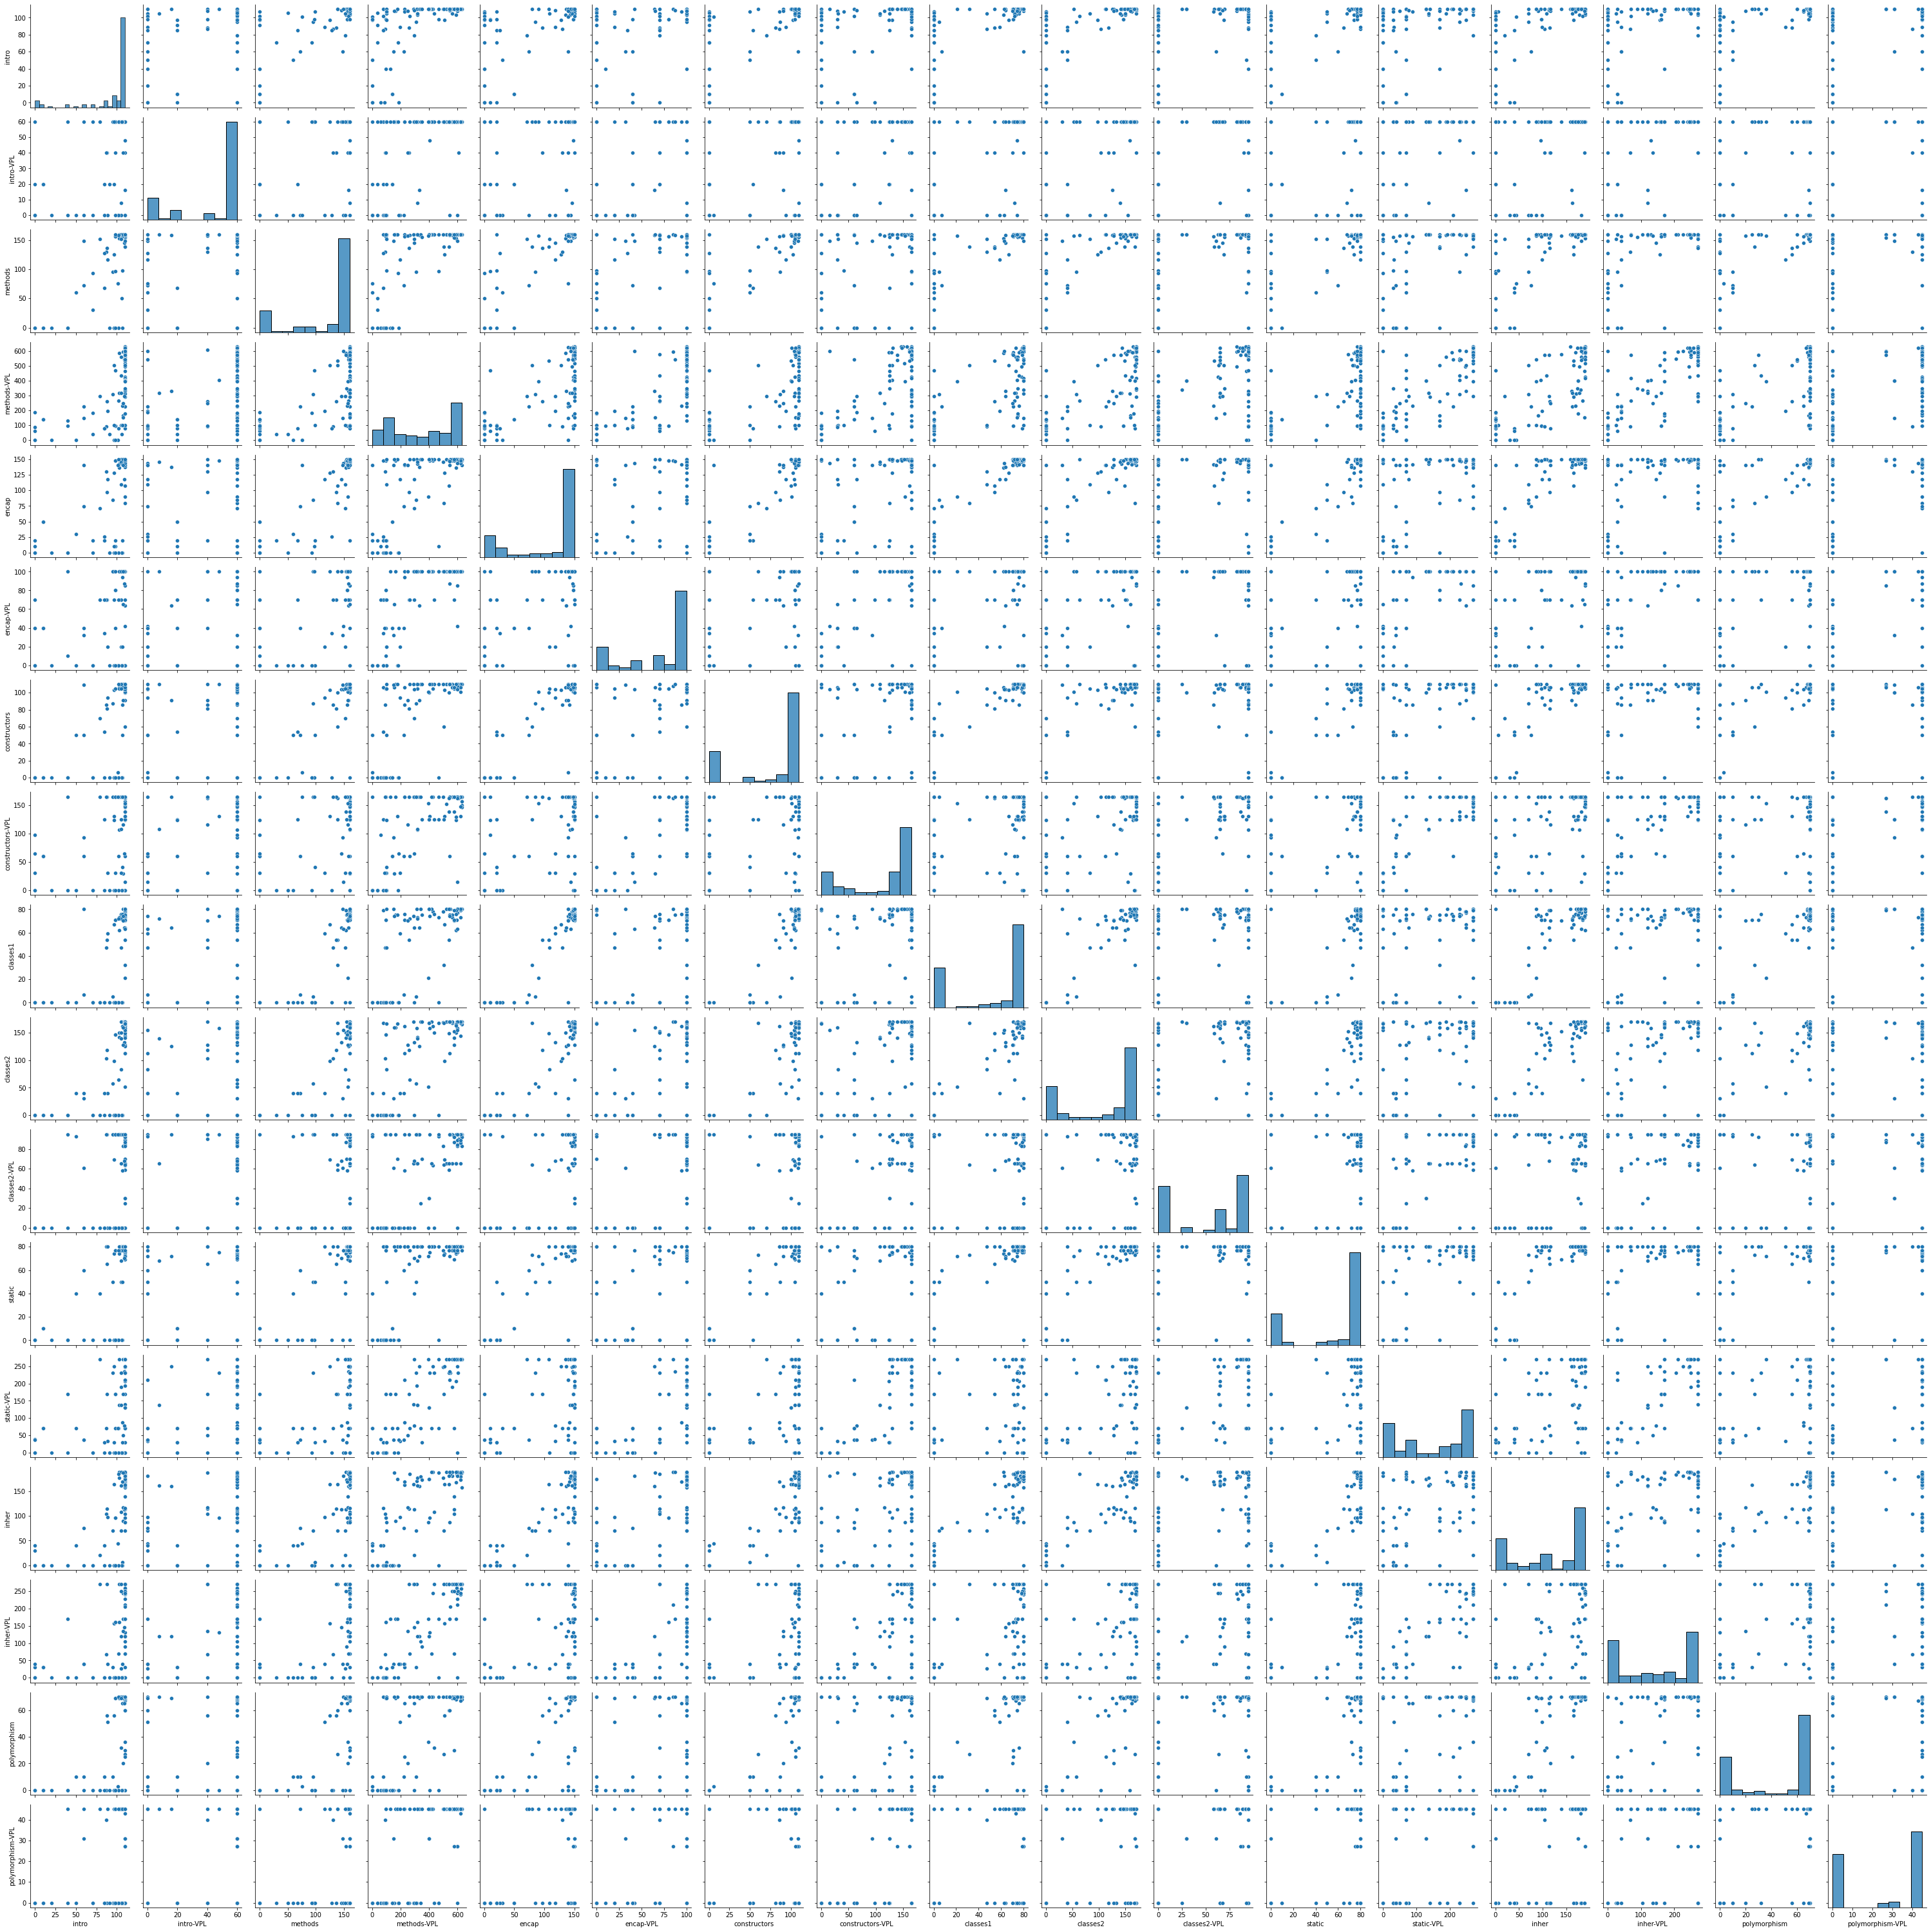

In [11]:
g = sns.PairGrid(dataset_reduced)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Description of Features with VPLs - Automatically Evaluated Programming Assignments

<AxesSubplot:>

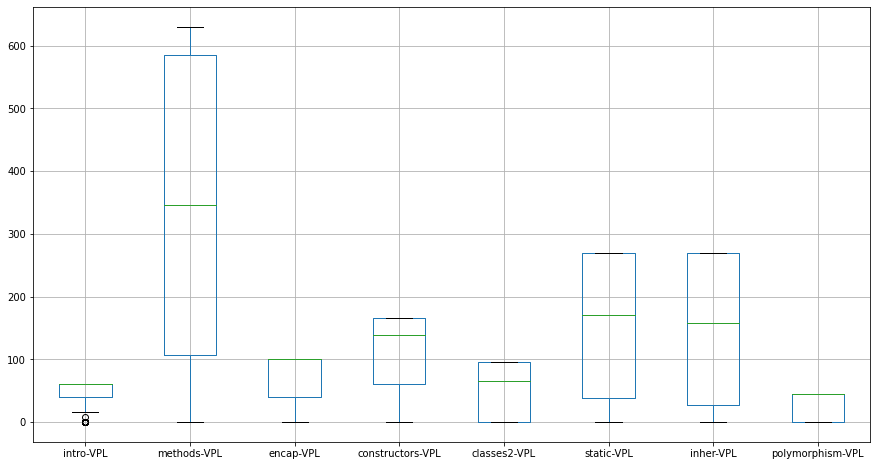

In [12]:
dataset_reduced.boxplot(column = ['intro-VPL','methods-VPL','encap-VPL','constructors-VPL','classes2-VPL','static-VPL',
                                          'inher-VPL',  'polymorphism-VPL'],figsize=(15,8))

### Description of Features for Micro-learning Units with Quizzes

<AxesSubplot:>

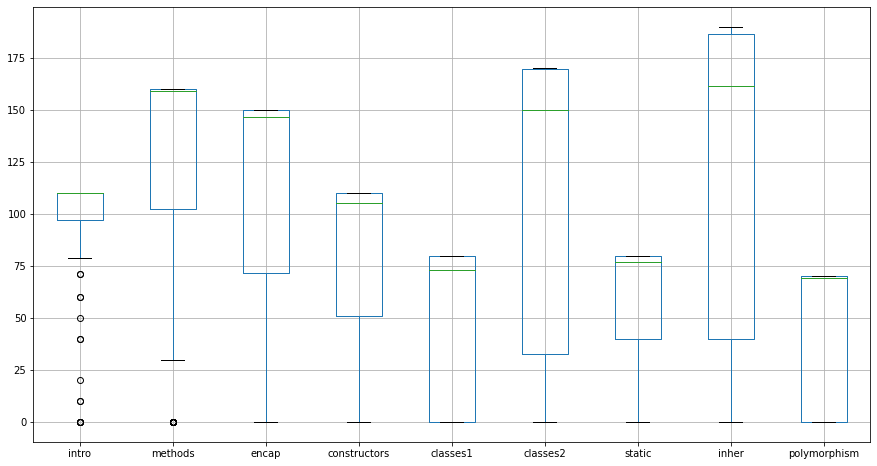

In [13]:
dataset_reduced.boxplot(column = ['intro','methods','encap','constructors','classes1','classes2','static', 'inher',  'polymorphism'],figsize=(15,8))

### Dataset Normalization and Visualization of Grades Over Topics

In [14]:
# copy the data 
dataset_reduced_min_max_scaled = dataset_reduced.copy() 
  
# apply normalization techniques 
for column in dataset_reduced_min_max_scaled.columns: 
    dataset_reduced_min_max_scaled[column] = (dataset_reduced_min_max_scaled[column] - dataset_reduced_min_max_scaled[column].min()) / (dataset_reduced_min_max_scaled[column].max() - dataset_reduced_min_max_scaled[column].min())     
   

<AxesSubplot:>

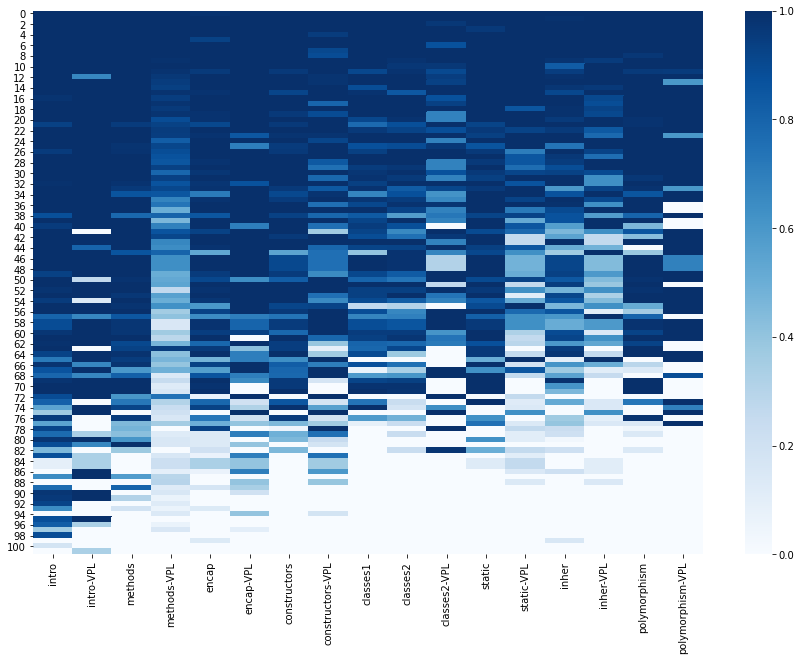

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dataset_reduced_min_max_scaled, cmap='Blues')

In [16]:
dataset_reduced.corr(method='spearman')

,intro,intro-VPL,methods,methods-VPL,encap,encap-VPL,constructors,constructors-VPL,classes1,classes2,classes2-VPL,static,static-VPL,inher,inher-VPL,polymorphism,polymorphism-VPL
intro,1.000000,0.554696,0.823184,0.741630,0.756987,0.655632,0.750949,0.462903,0.769973,0.799437,0.422968,0.744914,0.617819,0.719442,0.613649,0.765491,0.510851
intro-VPL,0.554696,1.000000,0.553167,0.521474,0.564133,0.570029,0.529508,0.519096,0.578190,0.573242,0.376203,0.548742,0.539914,0.542211,0.539519,0.527128,0.439360
methods,0.823184,0.553167,1.000000,0.703647,0.850211,0.668541,0.854673,0.501322,0.854209,0.814883,0.471693,0.804898,0.615815,0.774447,0.630250,0.807680,0.543435
methods-VPL,0.741630,0.521474,0.703647,1.000000,0.684170,0.780068,0.718098,0.597180,0.738520,0.771162,0.571024,0.651329,0.837327,0.803100,0.806478,0.690057,0.651569
encap,0.756987,0.564133,0.850211,0.684170,1.000000,0.607419,0.862756,0.505264,0.862313,0.842227,0.446467,0.816903,0.576520,0.801805,0.618771,0.857808,0.514923
encap-VPL,0.655632,0.570029,0.668541,0.780068,0.607419,1.000000,0.644660,0.669163,0.642104,0.681103,0.597559,0.620922,0.751434,0.673621,0.726294,0.590053,0.619733
constructors,0.750949,0.529508,0.854673,0.718098,0.862756,0.644660,1.000000,0.512340,0.844933,0.845751,0.516844,0.748485,0.644834,0.797202,0.682142,0.807300,0.599417
constructors-VPL,0.462903,0.519096,0.501322,0.597180,0.505264,0.669163,0.512340,1.000000,0.483317,0.551548,0.738707,0.502234,0.724223,0.565398,0.677802,0.469301,0.597897
classes1,0.769973,0.578190,0.854209,0.738520,0.862313,0.642104,0.844933,0.483317,1.000000,0.886645,0.460544,0.797561,0.616972,0.816387,0.648185,0.838392,0.537272
classes2,0.799437,0.573242,0.814883,0.771162,0.842227,0.681103,0.845751,0.551548,0.886645,1.000000,0.522602,0.820736,0.656699,0.894717,0.705262,0.872350,0.566886


Correlation matrix for all features.

<AxesSubplot:>

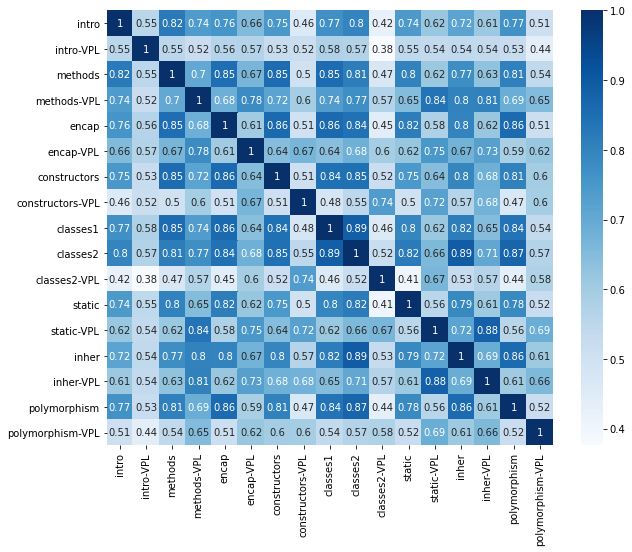

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset_reduced.corr(method='spearman'), 
        xticklabels=dataset_reduced.columns,
        yticklabels=dataset_reduced.columns, cmap='Blues', annot=True)

Correlation matrix for VPL-like features

<AxesSubplot:>

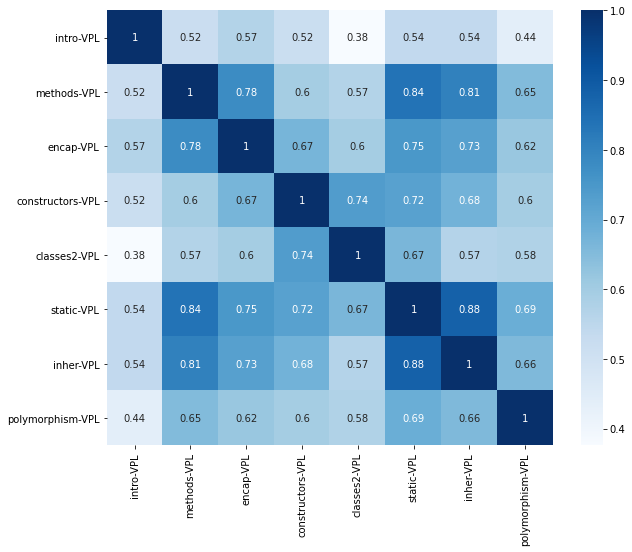

In [18]:
dataset_reduced_VPL = dataset_reduced[['intro-VPL','methods-VPL','encap-VPL','constructors-VPL','classes2-VPL','static-VPL',
                                          'inher-VPL',  'polymorphism-VPL']]
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset_reduced_VPL.corr(method='spearman'), 
        xticklabels=dataset_reduced_VPL.columns,
        yticklabels=dataset_reduced_VPL.columns, cmap='Blues', annot=True)

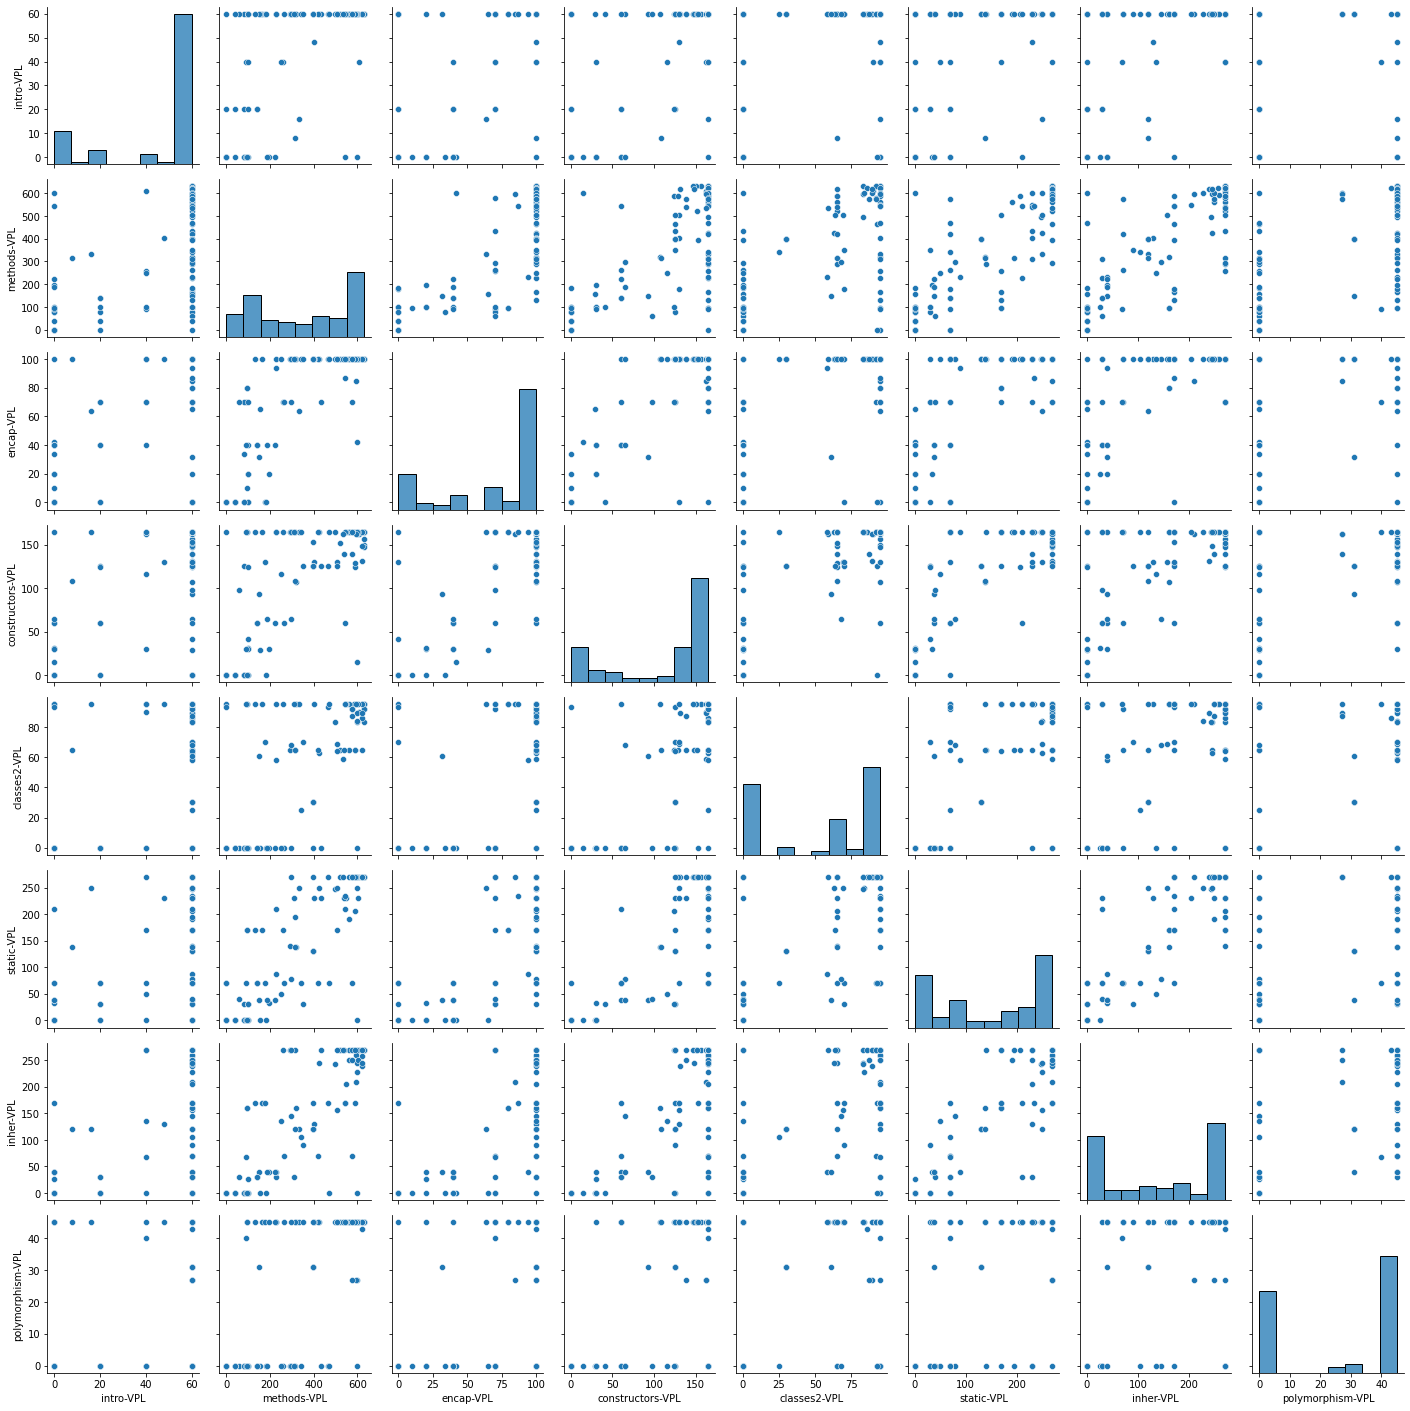

In [19]:
g_vpl = sns.PairGrid(dataset_reduced_VPL)
g_vpl.map_diag(sns.histplot)
g_vpl.map_offdiag(sns.scatterplot)

Correlation matrix for Micro-learning units with Quizzes.

<AxesSubplot:>

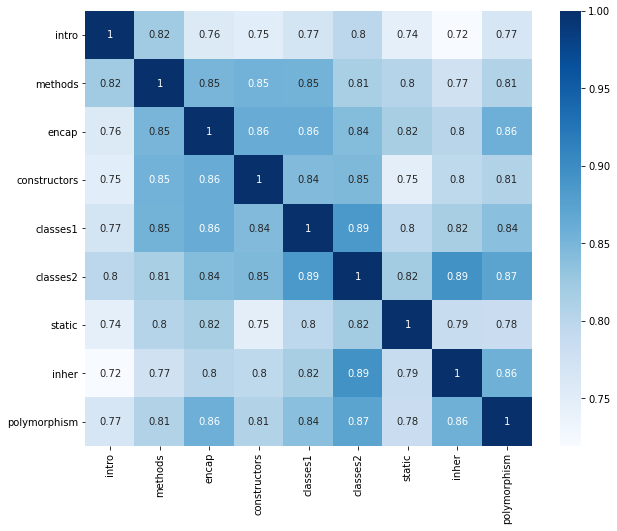

In [20]:
dataset_reduced_mc_lessons = dataset_reduced[['intro','methods','encap','constructors','classes1','classes2','static', 'inher',  'polymorphism']]
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset_reduced_mc_lessons.corr(method='spearman'), 
        xticklabels=dataset_reduced_mc_lessons.columns,
        yticklabels=dataset_reduced_mc_lessons.columns, cmap='Blues', annot=True)

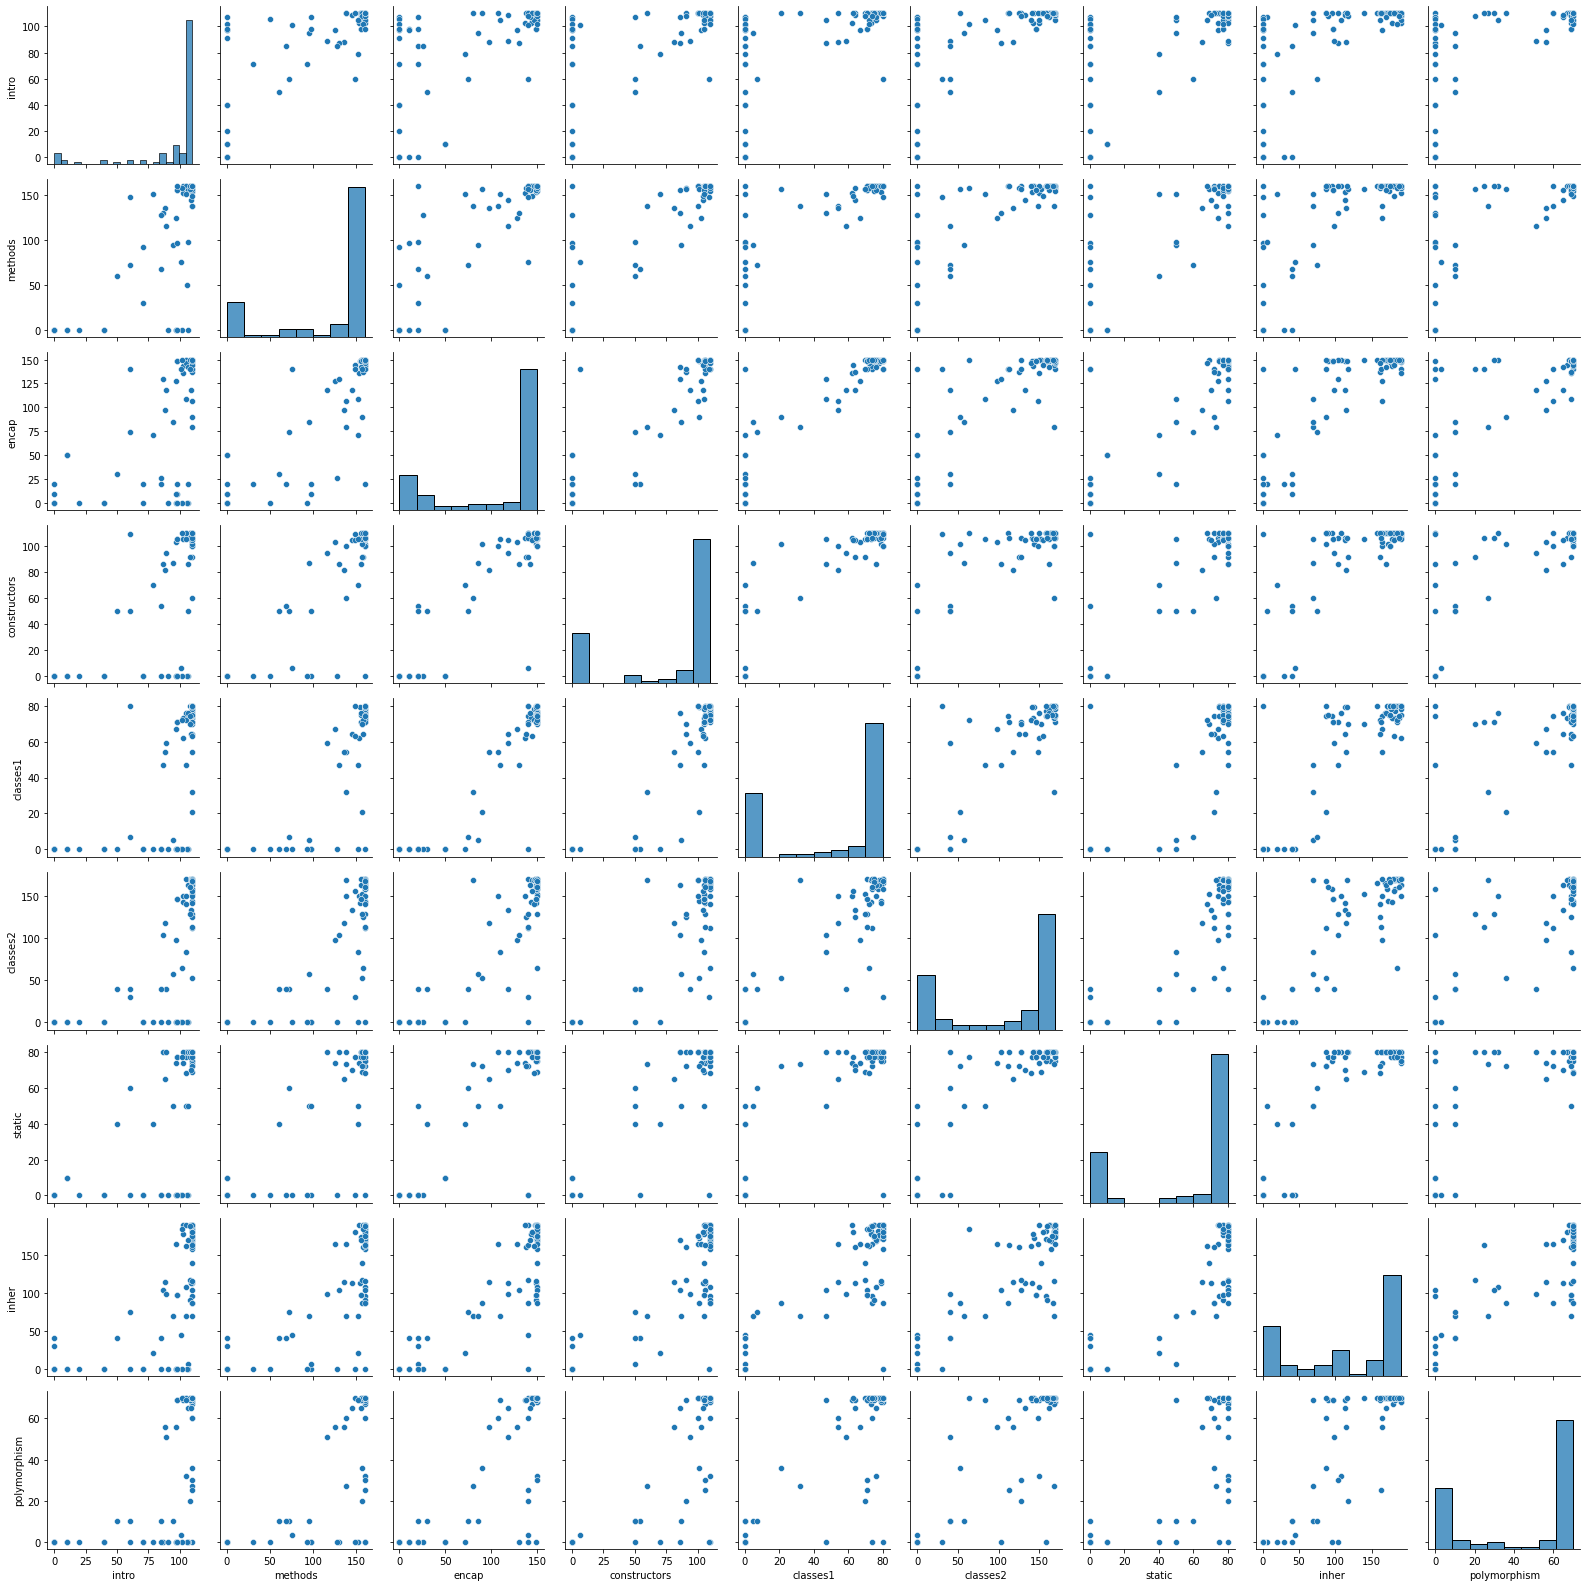

In [21]:
g_mc = sns.PairGrid(dataset_reduced_mc_lessons)
g_mc.map_diag(sns.histplot)
g_mc.map_offdiag(sns.scatterplot)

## Creating Datasets for different Term Periods

In [22]:
dataset_T1 = dataset_reduced[['intro','intro-VPL','methods','methods-VPL']]
dataset_T2 = dataset_reduced[['encap','encap-VPL','constructors','constructors-VPL','classes1','classes2','classes2-VPL','static','static-VPL',]]
dataset_T3 = dataset_reduced[['inher','inher-VPL', 'polymorphism', 'polymorphism-VPL']]

In [23]:
dataset_T1 = dataset_T1.astype(float)
dataset_T2 = dataset_T2.astype(float)
dataset_T3 = dataset_T3.astype(float)

## Modelling

## Clustering of All Features

In [24]:
from pycaret.clustering import *

# input_dataset1 = setup(dataset_reduced, normalize = True, pca=True, pca_components=2, 
 #                     numeric_features = ['intro-VPL','methods','methods-VPL','encap','encap-VPL','constructors','constructors-VPL','classes1','classes2','classes2-VPL','static','static-VPL','inher','inher-VPL', 'polymorphism', 'polymorphism-VPL'],
  #                   session_id = 123)

input_dataset1 = setup(dataset_reduced, normalize = True,
                numeric_features = ['intro-VPL','methods','methods-VPL','encap','encap-VPL','constructors','constructors-VPL','classes1','classes2','classes2-VPL','static','static-VPL','inher','inher-VPL', 'polymorphism', 'polymorphism-VPL'],
                session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(102, 17)"
2,Missing Values,False
3,Numeric Features,17
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(102, 17)"
9,CPU Jobs,-1


Initial model with k=4.

In [25]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3747,93.1811,1.3109,0,0,0


In [26]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)

Elbow method.

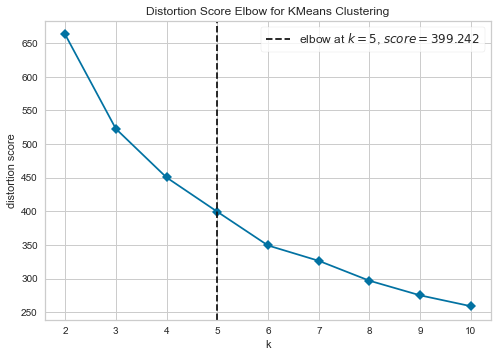

In [27]:
plot_model(kmeans, plot = 'elbow')

Model evaluation.

In [28]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

### K-Means Clustering with Different k

In [29]:
kmeans5 = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3284,81.0733,1.483,0,0,0


In [30]:
kmeans5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)

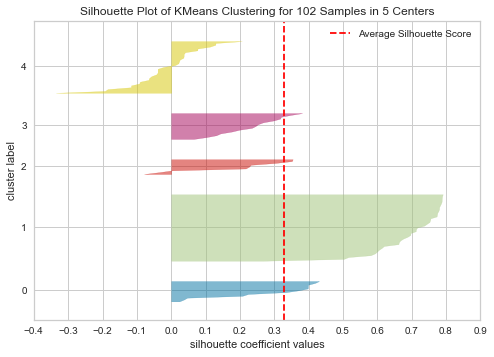

In [31]:
plot_model(kmeans5, plot = 'silhouette')

In [32]:
evaluate_model(kmeans5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [33]:
plot_model(kmeans5)

In [34]:
kmeans4 = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3747,93.1811,1.3109,0,0,0


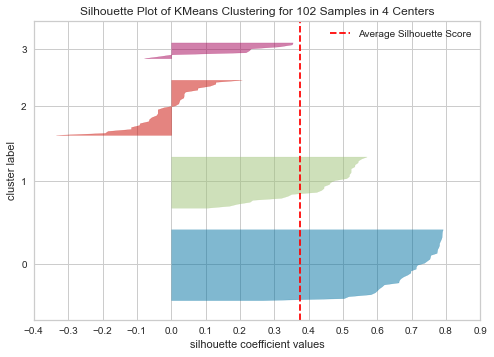

In [35]:
plot_model(kmeans4, plot = 'silhouette')

In [36]:
kmeans3 = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4313,114.7803,1.2559,0,0,0


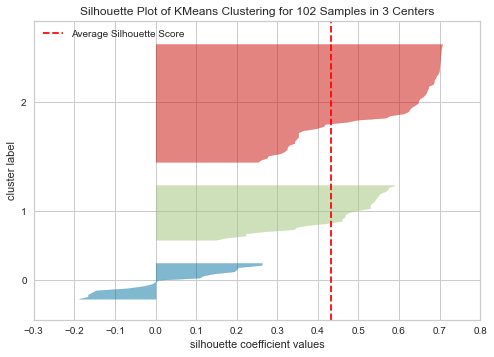

In [37]:
plot_model(kmeans3, plot = 'silhouette')

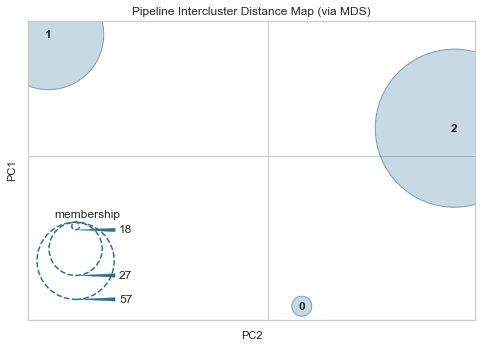

In [38]:
plot_model(kmeans3, plot = 'distance')

In [39]:
kmeans2 = create_model('kmeans', num_clusters = 2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.57,161.6648,0.6984,0,0,0


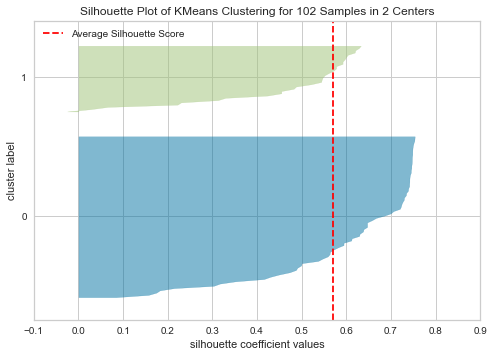

In [40]:
plot_model(kmeans2, plot = 'silhouette')

In [41]:
evaluate_model(kmeans2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [42]:
plot_model(kmeans2)

In [43]:
kmeans6 = create_model('kmeans', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3465,76.1701,1.2466,0,0,0


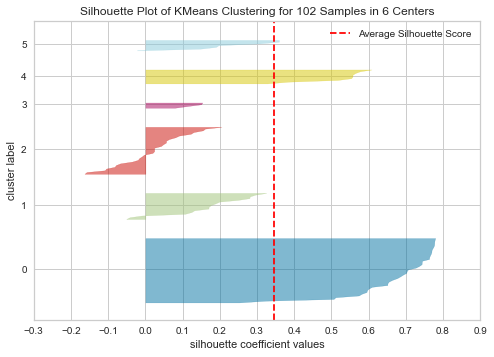

In [44]:
plot_model(kmeans6, plot = 'silhouette')

In [45]:
evaluate_model(kmeans6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [46]:
kmeans_df5 = assign_model(kmeans5)

In [47]:
kmeans_df5.head()

,intro,intro-VPL,methods,methods-VPL,encap,encap-VPL,constructors,constructors-VPL,classes1,classes2,classes2-VPL,static,static-VPL,inher,inher-VPL,polymorphism,polymorphism-VPL,Cluster
0,110.0,60.0,160.0,630.0,148.0,100.0,110.0,165.0,80.0,170.0,95.0,80.0,270.0,190.0,270.0,70.0,45.0,Cluster 1
1,110.0,60.0,160.0,630.0,150.0,100.0,110.0,165.0,80.0,170.0,95.0,80.0,270.0,188.0,270.0,70.0,45.0,Cluster 1
2,110.0,60.0,160.0,630.0,150.0,100.0,110.0,165.0,80.0,170.0,92.0,80.0,270.0,190.0,270.0,70.0,45.0,Cluster 1
3,110.0,60.0,160.0,630.0,150.0,100.0,110.0,165.0,80.0,170.0,95.0,77.0,270.0,190.0,270.0,70.0,45.0,Cluster 1
4,110.0,60.0,160.0,630.0,150.0,100.0,110.0,157.0,80.0,170.0,95.0,80.0,270.0,190.0,270.0,70.0,45.0,Cluster 1


### Clustering with Other Clustering Methods - DBSCAN

In [48]:
model_dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0397,19.7449,1.0447,0,0,0


In [49]:
plot_model(model_dbscan)

In [50]:
model_dbscan2 = create_model('dbscan', eps = 0.7)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1734,33.4757,1.0102,0,0,0


In [51]:
model_dbscan3 = create_model('dbscan', eps = 0.3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0864,10.5508,1.0586,0,0,0


In [52]:
model_dbscan4 = create_model('dbscan', eps = 0.9)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2354,42.3797,0.9726,0,0,0


In [53]:
model_dbscan5 = create_model('dbscan', eps = 2.0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3653,82.1147,1.2025,0,0,0


In [54]:
model_dbscan6 = create_model('dbscan', eps = 3.20)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4583,94.3754,1.4969,0,0,0


In [55]:
model_dbscan6

DBSCAN(algorithm='auto', eps=3.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [56]:
evaluate_model(model_dbscan6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

## Clustering with Other Clustering Methods - OPTICS

In [57]:
model_optics = create_model('optics')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0615,17.0579,1.3876,0,0,0


In [58]:
plot_model(model_optics)

## Clustering with Other Clustering Methods - Affinity Propagation

In [59]:
model_ap = create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3662,57.6724,1.2593,0,0,0


In [60]:
plot_model(model_ap)

## Clustering with Other Clustering Methods - Mean Shift

In [61]:
model_meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3891,41.8296,0.7929,0,0,0


In [62]:
evaluate_model(model_meanshift)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

## Clustering with Other Clustering Methods - Hierarchical Clustering

In [63]:
model_hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3688,85.9097,1.2241,0,0,0


In [64]:
plot_model(model_hclust)

## Clustering with Other Clustering Methods - BIRCH

In [65]:
model_birch = create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4499,83.2682,1.0465,0,0,0


In [66]:
plot_model(model_birch)

In [67]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x000001662E0C4730>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x0000016...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x000001662E...,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x000001662E0A3...,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x000001662E0...,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x000001662E0A...,make_scorer(completeness_score),pred,{},True,True,False


## Aglomerative Clustering

In [68]:
model_aglomerative4 = create_model('hclust', n_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3688,85.9097,1.2241,0,0,0


In [69]:
evaluate_model(model_aglomerative4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

## Modelling Individual Term Periods with K-Means for Different k

#### The First Period

In [70]:
from pycaret.clustering import *

dataset_T1 = dataset_T1.astype(float)

input_dataset2 = setup(dataset_T1, normalize = True, 
                      session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(102, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(102, 4)"
9,CPU Jobs,-1


In [71]:
kmeansT1 = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4917,118.7943,0.8273,0,0,0


In [72]:
kmeansT1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)

In [73]:
evaluate_model(kmeansT1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [74]:
kmeansT1_3 = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4654,109.8245,0.8889,0,0,0


In [75]:
evaluate_model(kmeansT1_3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [76]:
kmeansT1_5 = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5219,128.2155,0.8026,0,0,0


In [77]:
evaluate_model(kmeansT1_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [78]:
kmeansT1_2 = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5947,132.5591,0.7669,0,0,0


In [79]:
evaluate_model(kmeansT1_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [80]:
kmeansT1_6 = create_model('kmeans', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5316,133.9519,0.7479,0,0,0


In [81]:
evaluate_model(kmeansT1_6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

Assignement of the results to the dataset values for cluster analysis results comparison.

In [82]:
kmeans_T1_4_assign = assign_model(kmeansT1)

In [83]:
kmeans_T1_6_assign = assign_model(kmeansT1_6)

In [84]:
kmeans_T1_2_assign = assign_model(kmeansT1_2)

In [85]:
kmeans_T1_6_assign.head()

,intro,intro-VPL,methods,methods-VPL,Cluster
0,110.0,60.0,160.0,630.0,Cluster 0
1,110.0,60.0,160.0,630.0,Cluster 0
2,110.0,60.0,160.0,630.0,Cluster 0
3,110.0,60.0,160.0,630.0,Cluster 0
4,110.0,60.0,160.0,630.0,Cluster 0


In [86]:
kmeans_T1_2_assign.head()

,intro,intro-VPL,methods,methods-VPL,Cluster
0,110.0,60.0,160.0,630.0,Cluster 0
1,110.0,60.0,160.0,630.0,Cluster 0
2,110.0,60.0,160.0,630.0,Cluster 0
3,110.0,60.0,160.0,630.0,Cluster 0
4,110.0,60.0,160.0,630.0,Cluster 0


In [87]:
clustersT = pd.DataFrame()
clustersTT = pd.DataFrame()
clustersTTT = pd.DataFrame()

In [88]:
clustersT['T1'] = kmeans_T1_6_assign['Cluster'] = kmeans_T1_6_assign['Cluster'].str.replace('\D+', '')

In [89]:
clustersTT = kmeans_T1_2_assign['Cluster']

In [90]:
clustersTT['T1'] = kmeans_T1_2_assign['Cluster'] = kmeans_T1_2_assign['Cluster'].str.replace('\D+', '')

In [91]:
clustersTTT['T1'] = kmeans_T1_4_assign['Cluster'] = kmeans_T1_4_assign['Cluster'].str.replace('\D+', '')

In [92]:
clustersTT['T1']

0      0
1      0
2      0
3      0
4      0
      ..
97     1
98     1
99     1
100    1
101    1
Name: Cluster, Length: 102, dtype: object

#### The Second Period

In [93]:
from pycaret.clustering import *

input_dataset3 = setup(dataset_T2, normalize = True,
                      session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(102, 9)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(102, 9)"
9,CPU Jobs,-1


In [94]:
kmeansT2_5 = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4677,133.5979,1.0457,0,0,0


In [95]:
kmeansT2_3 = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5643,167.2016,0.7829,0,0,0


In [96]:
kmeansT2_4 = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5701,144.1638,0.9049,0,0,0


In [97]:
kmeansT2_2 = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6297,204.7539,0.5791,0,0,0


In [98]:
kmeansT2_6 = create_model('kmeans', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4565,123.8955,1.0332,0,0,0


In [99]:
evaluate_model(kmeansT2_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [100]:
evaluate_model(kmeansT2_3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [101]:
evaluate_model(kmeansT2_4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [102]:
evaluate_model(kmeansT2_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [103]:
evaluate_model(kmeansT2_6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [104]:
kmeans_T2_6_assign = assign_model(kmeansT2_6)

In [105]:
kmeans_T2_6_assign.head()

,encap,encap-VPL,constructors,constructors-VPL,classes1,classes2,classes2-VPL,static,static-VPL,Cluster
0,148.0,100.0,110.0,165.0,80.0,170.0,95.0,80.0,270.0,Cluster 0
1,150.0,100.0,110.0,165.0,80.0,170.0,95.0,80.0,270.0,Cluster 0
2,150.0,100.0,110.0,165.0,80.0,170.0,92.0,80.0,270.0,Cluster 0
3,150.0,100.0,110.0,165.0,80.0,170.0,95.0,77.0,270.0,Cluster 0
4,150.0,100.0,110.0,157.0,80.0,170.0,95.0,80.0,270.0,Cluster 0


In [106]:
clustersT['T2'] = kmeans_T2_6_assign['Cluster'] = kmeans_T2_6_assign['Cluster'].str.replace('\D+', '')

In [107]:
clustersT['T2']

0      0
1      0
2      0
3      0
4      0
      ..
97     1
98     1
99     1
100    1
101    1
Name: T2, Length: 102, dtype: object

In [108]:
kmeans_T2_2_assign = assign_model(kmeansT2_2)

In [109]:
clustersTT['T2'] = kmeans_T2_2_assign['Cluster'] = kmeans_T2_2_assign['Cluster'].str.replace('\D+', '')

In [110]:
clustersTT['T2']

0      0
1      0
2      0
3      0
4      0
      ..
97     1
98     1
99     1
100    1
101    1
Name: Cluster, Length: 102, dtype: object

In [111]:
kmeans_T2_4_assign = assign_model(kmeansT2_4)

In [112]:
clustersTTT['T2'] = kmeans_T2_4_assign['Cluster'] = kmeans_T2_4_assign['Cluster'].str.replace('\D+', '')

#### The Third Period

In [113]:
from pycaret.clustering import *

input_dataset4 = setup(dataset_T3, normalize = True, 
                      session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(102, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(102, 4)"
9,CPU Jobs,-1


In [114]:
kmeansT3_6 = create_model('kmeans', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5948,187.3231,0.7725,0,0,0


In [115]:
kmeansT3_5 = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5775,177.7359,0.7942,0,0,0


In [116]:
kmeansT3_4 = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6057,167.6004,0.7765,0,0,0


In [117]:
kmeansT3_3 = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5677,150.9572,0.8597,0,0,0


In [118]:
kmeansT3_2 = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5956,182.6024,0.6036,0,0,0


In [119]:
evaluate_model(kmeansT3_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [120]:
evaluate_model(kmeansT3_3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [121]:
evaluate_model(kmeansT3_4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [122]:
evaluate_model(kmeansT3_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [123]:
evaluate_model(kmeansT3_6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [124]:
kmeans_T3_6_assign = assign_model(kmeansT3_6)
kmeans_T3_6_assign.head()
clustersT['T3'] = kmeans_T3_6_assign['Cluster'] = kmeans_T3_6_assign['Cluster'].str.replace('\D+', '')

In [125]:
clustersT['T3']

0      1
1      1
2      1
3      1
4      1
      ..
97     2
98     2
99     2
100    2
101    2
Name: T3, Length: 102, dtype: object

In [126]:
kmeans_T3_2_assign = assign_model(kmeansT3_2)

In [127]:
clustersTT['T3'] = kmeans_T3_2_assign['Cluster'] = kmeans_T3_2_assign['Cluster'].str.replace('\D+', '')

In [128]:
clustersTT['T3']

0      1
1      1
2      1
3      1
4      1
      ..
97     0
98     0
99     0
100    0
101    0
Name: Cluster, Length: 102, dtype: object

In [129]:
kmeans_T3_4_assign = assign_model(kmeansT3_4)

In [130]:
clustersTTT['T3'] = kmeans_T3_4_assign['Cluster'] = kmeans_T3_4_assign['Cluster'].str.replace('\D+', '')

### VPL Features Custering

In [131]:
from pycaret.clustering import *

input_dataset5 = setup(dataset_reduced_VPL, normalize = True, 
                      numeric_features = ['intro-VPL','methods-VPL','encap-VPL','constructors-VPL','classes2-VPL','static-VPL',
                                          'inher-VPL',  'polymorphism-VPL'],
                      session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(102, 8)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(102, 8)"
9,CPU Jobs,-1


In [132]:
kmeans_vpl2 = create_model('kmeans', num_clusters = 2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5482,162.3892,0.703,0,0,0


In [133]:
kmeans_vpl3 = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4275,121.716,1.1015,0,0,0


In [134]:
kmeans_vpl4 = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.396,100.6032,1.0784,0,0,0


In [135]:
kmeans_vpl5 = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4148,91.6369,1.18,0,0,0


In [136]:
kmeans_vpl6 = create_model('kmeans', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4228,81.6195,1.152,0,0,0


In [137]:
evaluate_model(kmeans_vpl2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [138]:
evaluate_model(kmeans_vpl3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [139]:
evaluate_model(kmeans_vpl4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [140]:
evaluate_model(kmeans_vpl5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [141]:
evaluate_model(kmeans_vpl6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [142]:
kmeans_VPL_2_assign = assign_model(kmeans_vpl2)

In [143]:
clustersVPL = pd.DataFrame()

In [144]:
clustersVPL['VPL'] = kmeans_VPL_2_assign['Cluster'] = kmeans_VPL_2_assign['Cluster'].str.replace('\D+', '')

In [145]:
clustersVPL.head()

,VPL
0,0
1,0
2,0
3,0
4,0


### Micro-learning Units with Quizees Features Clusters

In [146]:
from pycaret.clustering import *

input_dataset6 = setup(dataset_reduced_mc_lessons, normalize = True, 
                      numeric_features = ['intro','methods','encap','constructors','classes1','classes2','static', 'inher',  'polymorphism'],
                      session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(102, 9)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(102, 9)"
9,CPU Jobs,-1


In [147]:
kmeans_mc_2 = create_model('kmeans', num_clusters = 2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7363,383.3815,0.4624,0,0,0


In [148]:
kmeans_mc_3 = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6896,286.8699,0.6816,0,0,0


In [149]:
kmeans_mc_4 = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5769,274.3522,0.8355,0,0,0


In [150]:
kmeans_mc_5 = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5605,262.406,0.9686,0,0,0


In [151]:
kmeans_mc_6 = create_model('kmeans', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5601,241.889,0.9954,0,0,0


In [152]:
evaluate_model(kmeans_mc_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [153]:
evaluate_model(kmeans_mc_3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [154]:
evaluate_model(kmeans_mc_4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [155]:
evaluate_model(kmeans_mc_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [156]:
evaluate_model(kmeans_mc_6)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [157]:
kmeans_MC_2_assign = assign_model(kmeans_mc_2)

In [158]:
clustersMC = pd.DataFrame()

In [159]:
clustersMC['MC'] = kmeans_MC_2_assign['Cluster'] = kmeans_MC_2_assign['Cluster'].str.replace('\D+', '')

## Calculation Changes Between Clusters

In [160]:
from sklearn.metrics.cluster import contingency_matrix

### Differences Between Micro-learning Units Features and VPL Features for k = 2

<AxesSubplot:>

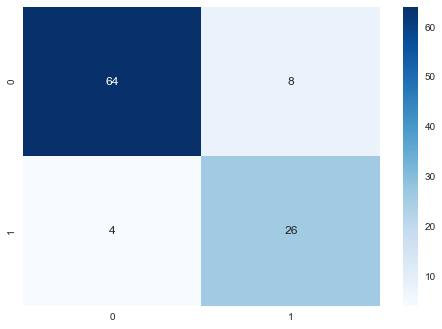

In [161]:
sns.heatmap(contingency_matrix(clustersMC['MC'], clustersVPL['VPL']), annot=True,cmap='Blues')

### Differences Between Different Term Periods

<AxesSubplot:>

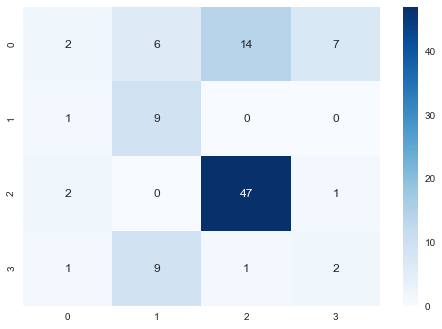

In [162]:
sns.heatmap(contingency_matrix(clustersTTT['T1'], clustersTTT['T2']), annot=True,cmap='Blues')

<AxesSubplot:>

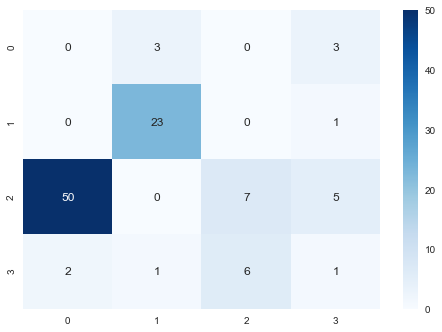

In [163]:
sns.heatmap(contingency_matrix(clustersTTT['T2'], clustersTTT['T3']), annot=True,cmap='Blues')

<AxesSubplot:>

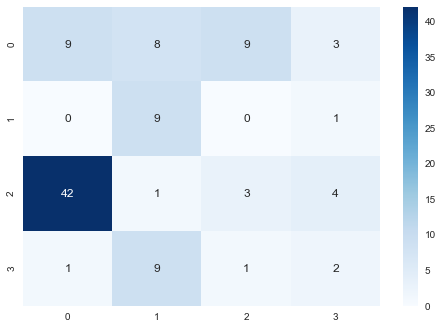

In [164]:
sns.heatmap(contingency_matrix(clustersTTT['T1'], clustersTTT['T3']), annot=True,cmap='Blues')

<AxesSubplot:>

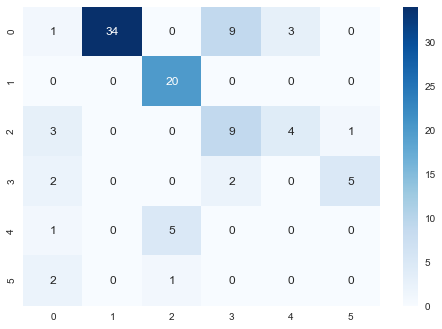

In [165]:
sns.heatmap(contingency_matrix(clustersT['T2'], clustersT['T3']), annot=True,cmap='Blues')

<AxesSubplot:>

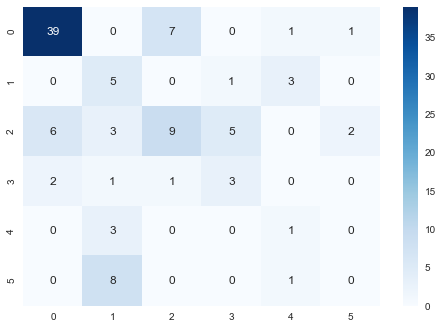

In [166]:
sns.heatmap(contingency_matrix(clustersT['T1'], clustersT['T2']), annot=True, cmap='Blues')

<AxesSubplot:>

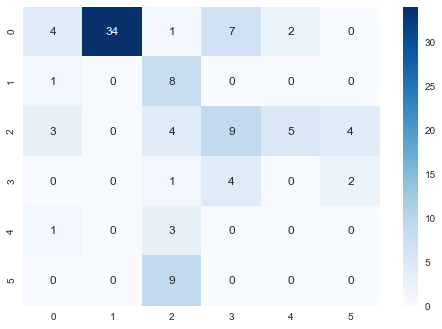

In [167]:
sns.heatmap(contingency_matrix(clustersT['T1'], clustersT['T3']), annot=True, cmap='Blues')

<AxesSubplot:>

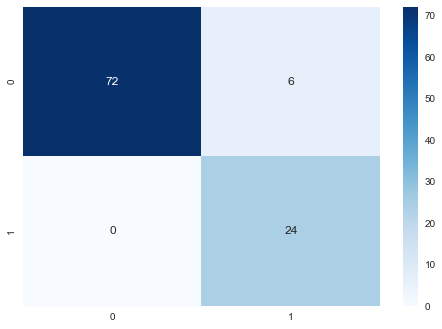

In [168]:
sns.heatmap(contingency_matrix(clustersTT['T1'], clustersTT['T2']), annot=True, cmap='Blues')

<AxesSubplot:>

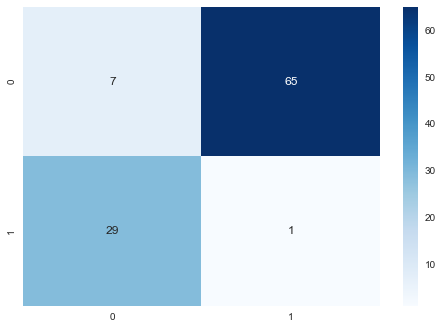

In [169]:
sns.heatmap(contingency_matrix(clustersTT['T2'], clustersTT['T3']), annot=True, cmap='Blues')

<AxesSubplot:>

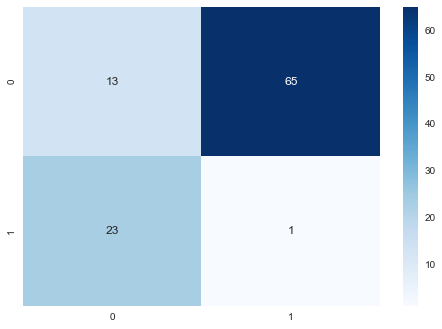

In [170]:
sns.heatmap(contingency_matrix(clustersTT['T1'], clustersTT['T3']), annot=True, cmap='Blues')

### Calculation of Adjusted Rand Score

In [171]:
 from sklearn.metrics.cluster import adjusted_rand_score

In [172]:
adjusted_rand_score(clustersMC['MC'], clustersVPL['VPL'])

0.573626442352794

In [173]:
adjusted_rand_score(clustersT['T1'], clustersT['T2'])

0.41652791113497356

In [174]:
adjusted_rand_score(clustersT['T2'], clustersT['T3'])

0.5438701342049281

In [175]:
adjusted_rand_score(clustersT['T1'], clustersT['T3'])

0.38476411751152273

In [176]:
adjusted_rand_score(clustersTT['T1'], clustersTT['T2'])

0.7660444202207385

In [177]:
adjusted_rand_score(clustersTT['T2'], clustersTT['T3'])

0.7043229112279911

In [178]:
adjusted_rand_score(clustersTT['T1'], clustersTT['T3'])

0.5113062795825317

In [179]:
adjusted_rand_score(clustersTTT['T1'], clustersTTT['T2'])

0.42580973489845253

In [180]:
adjusted_rand_score(clustersTTT['T2'], clustersTTT['T3'])

0.6094009866667736

In [181]:
adjusted_rand_score(clustersTTT['T1'], clustersTTT['T3'])

0.3720311461048107

## PCA Calculation as an Alternative 

In [182]:
from sklearn.decomposition import PCA

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler()

In [185]:
dataset_reduced_std = scaler.fit_transform(dataset_reduced)

In [186]:
pca = PCA()
pca.fit(dataset_reduced_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [187]:
pca.explained_variance_ratio_

array([0.7213091 , 0.08549269, 0.04057368, 0.02849862, 0.02558219,
       0.02225842, 0.01827447, 0.01402138, 0.01056267, 0.00706838,
       0.00671829, 0.00574404, 0.00488592, 0.00321943, 0.00249536,
       0.00206142, 0.00123395])

Text(0, 0.5, 'Cumulative Explained Variance')

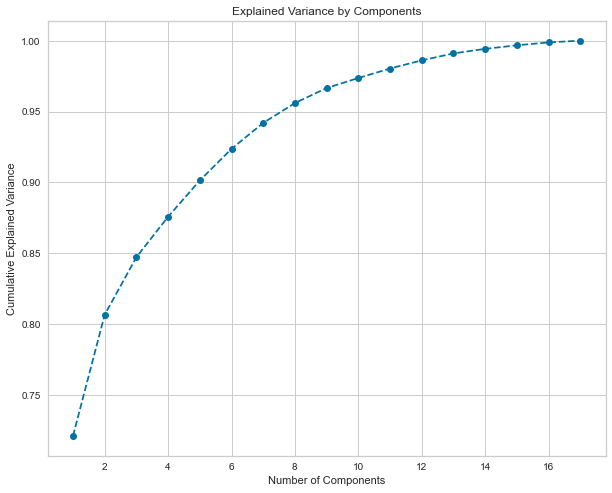

In [188]:
plt.figure(figsize = (10,8))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(),'bo', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [189]:
pca2 = PCA()
pca2.fit(dataset_reduced_min_max_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [190]:
pca2.explained_variance_ratio_

array([0.72795641, 0.08659105, 0.03790389, 0.02998272, 0.02722763,
       0.01842525, 0.01603878, 0.01304666, 0.00941073, 0.00704008,
       0.0066948 , 0.00603634, 0.00454973, 0.00312783, 0.00259642,
       0.00207652, 0.00129516])

Text(0, 0.5, 'Cumulative Explained Variance')

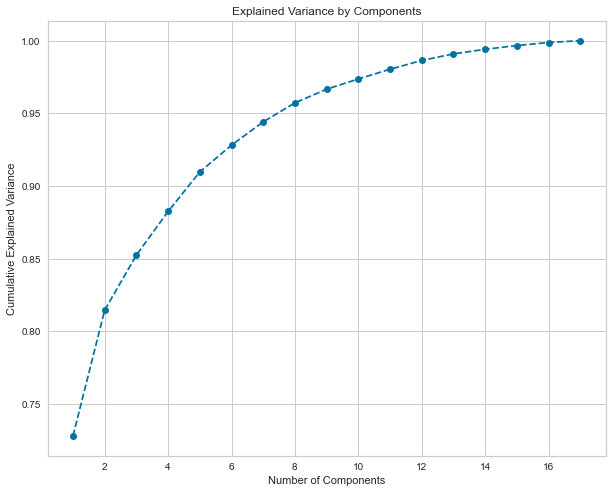

In [191]:
plt.figure(figsize = (10,8))
plt.plot(range(1,18), pca2.explained_variance_ratio_.cumsum(),'bo', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [192]:
dataset_reduced_min_max_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
intro,102.0,0.859180,0.273646,0.0,0.884091,1.000000,1.000000,1.0
intro-VPL,102.0,0.769935,0.387327,0.0,0.666667,1.000000,1.000000,1.0
methods,102.0,0.771385,0.372810,0.0,0.640625,0.993750,1.000000,1.0
methods-VPL,102.0,0.553719,0.355638,0.0,0.170635,0.549206,0.927778,1.0
encap,102.0,0.724967,0.390893,0.0,0.478333,0.976667,1.000000,1.0
encap-VPL,102.0,0.715980,0.386421,0.0,0.400000,1.000000,1.000000,1.0
constructors,102.0,0.719251,0.406814,0.0,0.463636,0.959091,1.000000,1.0
constructors-VPL,102.0,0.682650,0.383134,0.0,0.363636,0.842424,1.000000,1.0
classes1,102.0,0.655025,0.427950,0.0,0.000000,0.912500,1.000000,1.0
classes2,102.0,0.643829,0.419726,0.0,0.191176,0.882353,0.998529,1.0


In [193]:
pca3 = PCA(n_components = 6)

In [194]:
pca3.fit(dataset_reduced_min_max_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [195]:
pca3.explained_variance_ratio_

array([0.72795641, 0.08659105, 0.03790389, 0.02998272, 0.02722763,
       0.01842525])